In [59]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
from keras import backend

# Load dataset

In [2]:
FINAL_DATASET_PATH = os.path.join("final_dataset", "final_dataset.csv")

whole_steam_data = pd.read_csv(FINAL_DATASET_PATH)

In [3]:
whole_steam_data.columns

Index(['Unnamed: 0', 'appid', 'user_reviews', 'desc', 'full_desc', 'popu_tags',
       'name', 'release_date', 'english', 'developer',
       ...
       'Captions available', 'In-App Purchases', 'MMO', 'VR Support',
       'Commentary available', 'Valve Anti-Cheat enabled',
       'Steam Turn Notifications', 'SteamVR Collectibles',
       'Includes Source SDK', 'Mods'],
      dtype='object', length=132)

In [4]:
whole_steam_data.head()

,Unnamed: 0,appid,user_reviews,desc,full_desc,popu_tags,name,release_date,english,developer,...,Captions available,In-App Purchases,MMO,VR Support,Commentary available,Valve Anti-Cheat enabled,Steam Turn Notifications,SteamVR Collectibles,Includes Source SDK,Mods
0,0,10,1,Play the world's number 1 online action game. ...,About This GamePlay the world's number 1 onlin...,ActionFPSMultiplayerShooterClassicTeam-BasedFi...,Counter-Strike,2000-11-01,1,Valve,...,0,0,0,0,0,1,0,0,0,0
1,1,20,1,One of the most popular online action games of...,About This GameOne of the most popular online ...,ActionFPSMultiplayerClassicHero ShooterShooter...,Team Fortress Classic,1999-04-01,1,Valve,...,0,0,0,0,0,1,0,0,0,0
2,2,30,1,Enlist in an intense brand of Axis vs. Allied ...,About This GameEnlist in an intense brand of A...,FPSWorld War IIMultiplayerShooterActionWarTeam...,Day of Defeat,2003-05-01,1,Valve,...,0,0,0,0,0,1,0,0,0,0
3,3,40,0,Enjoy fast-paced multiplayer gaming with Death...,About This GameEnjoy fast-paced multiplayer ga...,ActionFPSClassicMultiplayerShooterFirst-Person...,Deathmatch Classic,2001-06-01,1,Valve,...,0,0,0,0,0,1,0,0,0,0
4,4,50,1,Return to the Black Mesa Research Facility as ...,About This GameReturn to the Black Mesa Resear...,FPSActionClassicSci-fiSingleplayerShooterFirst...,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,...,0,0,0,0,0,1,0,0,0,0


Split dataset into train_data and test_data

In [5]:
# train_data, test_data = train_test_split(whole_steam_data, test_size=0.2, random_state=42)

In [6]:
# print(train_data.user_reviews.value_counts())

In [7]:
# print(test_data.user_reviews.value_counts())

In [8]:
# X = whole_steam_data.loc[:, whole_steam_data.columns != "user_reviews"]
# y = whole_steam_data["user_reviews"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

In [9]:
# plt.hist(y_train, label="train")
# plt.hist(y_test, label="test")
# plt.legend()
# plt.show()

In [10]:
# seed=123
# kfold = StratifiedKFold(n_splits=5, random_state=seed)

In [11]:
# pipeline1 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(probability=True))])

# param_grid_1 = {
#             'preprocessing': [StandardScaler(), None],
#             'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
#             'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
# }

# grid_1 = GridSearchCV(pipeline1, param_grid_1, cv=kfold, return_train_score=True)

# grid_1.fit(X_train, y_train)
# models.append(('SVM linear', grid_1.best_estimator_))
# grid_1.best_params_

In [12]:
from sklearn.model_selection import train_test_split

# 500, 800, 1000, 3600, 5000, 10_000, 12_000

temp_steam_data = whole_steam_data.head(500)

X = temp_steam_data.loc[:, temp_steam_data.columns != "user_reviews"]
y = temp_steam_data["user_reviews"]

# X = whole_steam_data.loc[:, whole_steam_data.columns != "user_reviews"]
# y = whole_steam_data["user_reviews"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(400, 131) (400,)
(100, 131) (100,)


In [13]:
print(y_train.value_counts())
print(y_test.value_counts())


1    243
0    157
Name: user_reviews, dtype: int64
1    59
0    41
Name: user_reviews, dtype: int64


In [14]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [15]:
num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["english", "windows", "mac", "linux", "achievements", "average_playtime", "median_playtime", "owners", "price", "Indie", "Action", "Adventure", "Casual", "Strategy", "Simulation", "RPG", "Early Access", "Free to Play", "Puzzle", "Racing", "VR", "Sports", "Anime", "Visual Novel", "Platformer", "Point & Click", "Horror", "Nudity", "FPS", "Multiplayer", "Sexual Content", "Violent", "Gore", "Massively Multiplayer", "Hidden Object", "Open World", "Survival", "Pixel Graphics", "Space", "Female Protagonist", "Shoot 'Em Up", "RTS", "Classic", "Turn-Based", "Arcade", "Sci-fi", "Story Rich", "Tower Defense", "Zombies", "Singleplayer", "World War II", "Card Game", "RPGMaker", "Great Soundtrack", "Management", "Co-op", "Fighting", "2D", "Turn-Based Strategy", "Fantasy", "Utilities", "Rogue-like", "Sandbox", "JRPG", "Board Game", "Retro", "Stealth", "Comedy", "Shooter", "Music", "Hack and Slash", "Bullet Hell", "Atmospheric", "First-Person", "City Builder", "Historical", "Psychological Horror", "Family Friendly", "Memes", "Match 3", "Mystery", "Difficult", "Local Multiplayer", "Driving", "Design & Illustration", "Cyberpunk", "Flight", "Building", "Clicker", "Walking Simulator", "Metroidvania", "Education", "Single-player", "Steam Achievements", "Steam Trading Cards", "Steam Cloud", "Full controller support", "Multi-player", "Partial Controller Support", "Steam Leaderboards", "Online Multi-Player", "Shared/Split Screen", "Stats", "Co-op", "Local Multi-Player", "Cross-Platform Multiplayer", "Online Co-op", "Includes level editor", "Steam Workshop", "Local Co-op", "Captions available", "In-App Purchases", "MMO", "VR Support", "Commentary available", "Valve Anti-Cheat enabled", "Steam Turn Notifications", "SteamVR Collectibles", "Includes Source SDK", "Mods"])),
        ("scaler", StandardScaler()),
        ("imputer", SimpleImputer(strategy="median")),
    ])

In [16]:
num_pipeline.fit_transform(X_train)

array([[ 0.        ,  0.        , -0.49609064, ..., -0.05006262,
        -0.14285714,  0.        ],
       [ 0.        ,  0.        , -0.49609064, ..., -0.05006262,
        -0.14285714,  0.        ],
       [ 0.        ,  0.        ,  2.01576069, ..., -0.05006262,
         7.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  2.01576069, ..., -0.05006262,
        -0.14285714,  0.        ],
       [ 0.        ,  0.        , -0.49609064, ..., -0.05006262,
        -0.14285714,  0.        ],
       [ 0.        ,  0.        , -0.49609064, ..., -0.05006262,
        -0.14285714,  0.        ]])

In [17]:
# from future_encoders import OneHotEncoder
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["desc", "name", "developer", "release_date"])),
        #("select_cat", DataFrameSelector(["developer"])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ])

In [18]:
cat_pipeline.fit_transform(X_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [20]:
seed=69420
kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)

In [21]:
# for gathering models
models = []


1. Linear SVC

In [22]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline), 
    ('classifier', LinearSVC(max_iter=50_000))])

param_grid = {
            'classifier__C': [0.25, 0.5, 1, 2, 3, 4]
}

#15_000, C=15, acc=0.62

grid_1 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
models.append(("SVC Linear", grid_1.best_estimator_))
grid_1.best_params_

{'classifier__C': 0.5}

2. SVC with rbf kernel

In [23]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline), 
    ('classifier', SVC(kernel='rbf'))])

param_grid = {
            'classifier__gamma': [0.001, 0.01, 0.1, 1, 10],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10]
}

#{'classifier__C': 10, 'classifier__gamma': 0.01} -> na 1000 robi 0.65 ACC

grid_2 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
models.append(("SVC rbf", grid_2.best_estimator_))
grid_2.best_params_

{'classifier__C': 10, 'classifier__gamma': 0.01}

3. SVC with poly kernel

In [24]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline), 
    ('classifier', SVC(kernel='poly'))])

param_grid = {
            'classifier__degree': [0.1, 1],
            'classifier__coef0': [0, 1],
            'classifier__C': [1, 10]
}

# {'classifier__C': 10, 'classifier__coef0': 0, 'classifier__degree': 1}

grid_3 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
models.append(("SVC poly", grid_3.best_estimator_))
grid_3.best_params_


{'classifier__C': 1, 'classifier__coef0': 0, 'classifier__degree': 1}

4. SVC

In [25]:
# pipeline1 = Pipeline([
#             ('preprocessing', preprocess_pipeline),
#             ('classifier', SVC(probability=True))])

# # param_grid_1 = {
# #             'classifier__gamma': [0.001, 0.01, 0.1, 1, 10],
# #             'classifier__C': [0.001, 0.01, 0.1, 1, 10]
# # }

# # param_grid_1 = {
# #             'classifier__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
# #             'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
# # }

# param_grid_1 = {
#             'classifier__gamma': [0.01],
#             'classifier__C': [10]
# }

# #{'classifier__C': 10, 'classifier__gamma': 0.01} -> na 1000 robi 0.68 ACC

# grid_4 = GridSearchCV(pipeline1, param_grid_1, cv=kfold, return_train_score=True)

# grid_4.fit(X_train, y_train)
# grid_4.best_params_

5. Logistic Regression

In [26]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline), 
    ('classifier', LogisticRegression())])

# param_grid = {
#             'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
#             'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],
# }
param_grid = {
            'classifier__C': [100, 800, 900, 1000, 1200, 1300, 1500, 1700],
            'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],
}

# 12_000, {'classifier__C': 1000, 'classifier__penalty': 'l2'} acc=0.662

grid_5 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_5.fit(X_train, y_train)
models.append(("LogisticRegression", grid_5.best_estimator_))
grid_5.best_params_

d:\AppTrue\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\AppTrue\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

{'classifier__C': 100, 'classifier__penalty': 'none'}

6. DecisionTreeClassifier

In [27]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline), 
    ('classifier', DecisionTreeClassifier())])

param_grid = {
            'classifier__max_depth': [1, 5, 10, 15, 20],
            'classifier__max_leaf_nodes': [None, 5, 10, 20, 45, 90],
}

# 5000, max_depth: 10, max_leaf_nodes: 20, acc=0.613

grid_6 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_6.fit(X_train, y_train)
models.append(("DecisionTreeClassifier", grid_6.best_estimator_))
grid_6.best_params_

{'classifier__max_depth': 20, 'classifier__max_leaf_nodes': 90}

7. RandomForestClassifier

In [28]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline), 
    ('classifier', RandomForestClassifier(n_jobs=-1))])

param_grid = {
            'classifier__n_estimators' : [1, 3, 5, 8, 40, 50],
            'classifier__max_leaf_nodes' : [2, 4, 8, 16, 32, 64],
}

# 3600, {'classifier__max_leaf_nodes': 64, 'classifier__n_estimators': 8}, acc=0.609

grid_7 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_7.fit(X_train, y_train)
models.append(("RandomForestClassifier", grid_7.best_estimator_))
grid_7.best_params_

{'classifier__max_leaf_nodes': 64, 'classifier__n_estimators': 50}

8. ExtraTreesClassifier

In [29]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline), 
    ('classifier', ExtraTreesClassifier(n_jobs=-1))])

param_grid = {
            'classifier__n_estimators' : [1, 3, 5, 8, 40, 50],
            'classifier__max_leaf_nodes' : [2, 4, 8, 16, 32, 64],
}

# 12_000, {'classifier__max_leaf_nodes': 32, 'classifier__n_estimators': 50}, acc=0.580

grid_8 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_8.fit(X_train, y_train)
models.append(("ExtraTreesClassifier", grid_8.best_estimator_))
grid_8.best_params_

{'classifier__max_leaf_nodes': 64, 'classifier__n_estimators': 8}

9. BaggingClassifier

In [30]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline), 
    ('classifier', BaggingClassifier())])

param_grid = {
            'classifier__max_samples' : [0.05, 0.1, 0.2, 0.5, 0.7, 1]
}

# 800, {'classifier__max_samples': 0.7}, acc=0.593

grid_9 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_9.fit(X_train, y_train)
models.append(("BaggingClassifier", grid_9.best_estimator_))
grid_9.best_params_

{'classifier__max_samples': 0.2}

10. KNeighborsClassifier

In [31]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline), 
    ('classifier', KNeighborsClassifier(n_jobs=-1))])

param_grid = {
            'classifier__p': [0.5, 1, 2],
}
# param_grid = {
#             'classifier__p': [1, 2, 3, 10, 100, 1000, 10000],
# }

# 800, {'classifier__p': 1}, acc=0.687, 3600 => acc=0.6

grid_10 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_10.fit(X_train, y_train)
models.append(("KNeighborsClassifier", grid_10.best_estimator_))
grid_10.best_params_

d:\AppTrue\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "d:\AppTrue\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\AppTrue\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "d:\AppTrue\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, 

{'classifier__p': 1}

11. AdaBoostClassifier

In [32]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline), 
    ('classifier', AdaBoostClassifier())])

param_grid = {
            'classifier__n_estimators' : [600, 700],
            'classifier__learning_rate' : [0.7, 1, 1.5],
}
# param_grid = {
#             'classifier__n_estimators' : [5, 10, 50, 100, 500, 600, 700],
#             'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.5, 0.7, 1],
# }

# 800, {'classifier__learning_rate': 1, 'classifier__n_estimators': 700}, acc=0.66

grid_11 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_11.fit(X_train, y_train)
models.append(("AdaBoostClassifier", grid_11.best_estimator_))
grid_11.best_params_

{'classifier__learning_rate': 0.7, 'classifier__n_estimators': 600}

12. Neural Networks

In [91]:
# for gathering deep models
deep_models = []

In [92]:
X_train_scaled = preprocess_pipeline.transform(X_train)
X_test_scaled = preprocess_pipeline.transform(X_test)

backend.clear_session()

history = History()
model_1 = Sequential()
# model_1.add(Dense(420,activation="sigmoid",input_shape=(X_train_scaled.shape[1],)))
# model_1.add(Dense(100, activation="sigmoid"))
# model_1.add(Dense(50, activation="sigmoid"))
# model_1.add(Dense(1, activation="relu"))

# acc 0.64
model_1.add(Dense(500,activation="elu",input_shape=(X_train_scaled.shape[1],)))
model_1.add(Dense(200, activation="elu"))
model_1.add(Dense(50, activation="elu"))
model_1.add(Dense(1, activation="relu"))

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               703500    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_2 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 813,801
Trainable params: 813,801
Non-trainable params: 0
_________________________________________________________________


In [93]:
model_1.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])


In [94]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, mode='min', verbose=1)
history = model_1.fit(X_train_scaled, y_train, validation_data= (X_test_scaled, y_test), batch_size=32, epochs=200, callbacks=[early_stopping])

Epoch 1/200
13/13 [==============================] - 1s 26ms/step - loss: 5.8080 - accuracy: 0.5000 - val_loss: 7.1583 - val_accuracy: 0.5000
Epoch 2/200
13/13 [==============================] - 0s 13ms/step - loss: 4.6634 - accuracy: 0.6675 - val_loss: 7.2905 - val_accuracy: 0.4900
Epoch 3/200
13/13 [==============================] - 0s 7ms/step - loss: 3.9140 - accuracy: 0.7125 - val_loss: 6.9515 - val_accuracy: 0.5000
Epoch 4/200
13/13 [==============================] - 0s 9ms/step - loss: 3.5257 - accuracy: 0.7325 - val_loss: 6.1549 - val_accuracy: 0.5400
Epoch 5/200
13/13 [==============================] - 0s 7ms/step - loss: 4.5317 - accuracy: 0.6725 - val_loss: 6.5095 - val_accuracy: 0.5400
Epoch 6/200
13/13 [==============================] - 0s 9ms/step - loss: 4.4140 - accuracy: 0.6850 - val_loss: 6.3509 - val_accuracy: 0.5700
Epoch 7/200
13/13 [==============================] - 0s 10ms/step - loss: 4.3949 - accuracy: 0.7100 - val_loss: 6.1743 - val_accuracy: 0.5900
Epoch 8/20

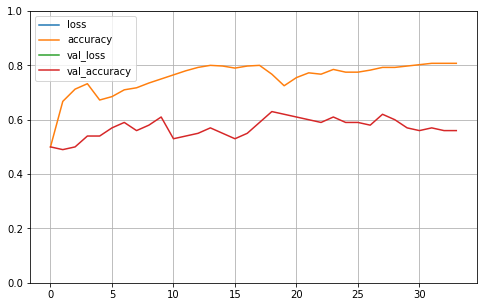

In [95]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [96]:
test_eval = model_1.evaluate(X_test_scaled,y_test)
test_eval

4/4 [==============================] - 0s 5ms/step - loss: 6.6279 - accuracy: 0.5600


[6.62790584564209, 0.5600000023841858]

In [97]:
deep_models.append(("Neural Network", model_1))

In [72]:
def get_recall_score(deep_model, X_test_scaled, y_test):
    recall_keras = keras.metrics.Recall()
    recall_keras.update_state(y_true=y_test, y_pred=(deep_model.predict(X_test_scaled) > 0.5).astype("int32"))
    return recall_keras.result().numpy()

In [73]:
def get_precision_score(deep_model, X_test_scaled, y_test):
    precision_keras = keras.metrics.Precision()
    precision_keras.update_state(y_true=y_test, y_pred=(deep_model.predict(X_test_scaled) > 0.5).astype("int32"))
    return precision_keras.result().numpy()

In [74]:
def get_accuracy_score(deep_model, X_test_scaled, y_test):
    accuracy_keras = keras.metrics.Accuracy()
    accuracy_keras.update_state(y_true=y_test, y_pred=(deep_model.predict(X_test_scaled) > 0.5).astype("int32"))
    return accuracy_keras.result().numpy()

In [75]:
def get_f1_score(deep_model, X_test_scaled, y_test):
    pres = get_precision_score(deep_model, X_test_scaled, y_test)
    rec = get_recall_score(deep_model, X_test_scaled, y_test)

    return (2 * pres * rec) / (pres + rec)

In [71]:
def get_roc_auc_score(deep_model, X_test_scaled, y_test):
    accuracy_keras = keras.metrics.AUC()
    accuracy_keras.update_state(y_true=y_test, y_pred=(deep_model.predict(X_test_scaled) > 0.5).astype("int32"))
    return accuracy_keras.result().numpy()

In [98]:
precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []

for name, model in models:
    print(name)
    print("precision_score: {}".format( metrics.precision_score(y_test, model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))
    print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test, model.predict(X_test)) ))
    print(model.predict(X_test))

    precision_score.append(metrics.precision_score(y_test, model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test)))
    f1_score.append(metrics.f1_score(y_test, model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))
    roc_auc_score.append(metrics.roc_auc_score(y_test, model.predict(X_test)))

for name, model in deep_models:
    print(name)
    print("precision_score: {}".format( get_precision_score(model, X_test_scaled, y_test) ))
    print("recall_score: {}".format( get_recall_score(model, X_test_scaled, y_test) ))
    print("f1_score: {}".format( get_f1_score(model, X_test_scaled, y_test) ))
    print("accuracy_score: {}".format( get_accuracy_score(model, X_test_scaled, y_test) ))
    print("roc_auc_score: {}".format( get_roc_auc_score(model, X_test_scaled, y_test) ))

    precision_score.append(get_precision_score(model, X_test_scaled, y_test))
    recall_score.append(get_recall_score(model, X_test_scaled, y_test))
    f1_score.append(get_f1_score(model, X_test_scaled, y_test))
    accuracy_score.append(get_accuracy_score(model, X_test_scaled, y_test))
    roc_auc_score.append(get_roc_auc_score(model, X_test_scaled, y_test))

SVC Linear
precision_score: 0.711864406779661
recall_score: 0.711864406779661
f1_score: 0.711864406779661
accuracy_score: 0.66
roc_auc_score: 0.6486151302190988
[1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1
 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0
 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1]
LogisticRegression
precision_score: 0.7258064516129032
recall_score: 0.7627118644067796
f1_score: 0.743801652892562
accuracy_score: 0.69
roc_auc_score: 0.6740388590326581
[1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1
 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0
 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1]
DecisionTreeClassifier
precision_score: 0.6323529411764706
recall_score: 0.7288135593220338
f1_score: 0.6771653543307087
accuracy_score: 0.59
roc_auc_score: 0.5595287308805291
[0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0
 1 1 1 1 

Comparison of all statistics:

In [84]:
d = {"precision_score": precision_score, 
     "recall_score": recall_score, 
     "f1_score": f1_score,
     "accuracy_score" : accuracy_score,
     "roc_auc_score" : roc_auc_score
    }

# df = pd.DataFrame(data=d)
# df.insert(loc=0, column="Method", value=["SVM rbf", "SVM poly", "SVM linear", "Logistic regression", "LinearSVC", "KNeighborsClassifier", "DecisionTreeClassifier", 
#                                          "RandomForestClassifier", "BaggingClassifier", "ExtraTreesClassifier", "AdaBoostClassifier","GradientBoostingClassifier"])
# df

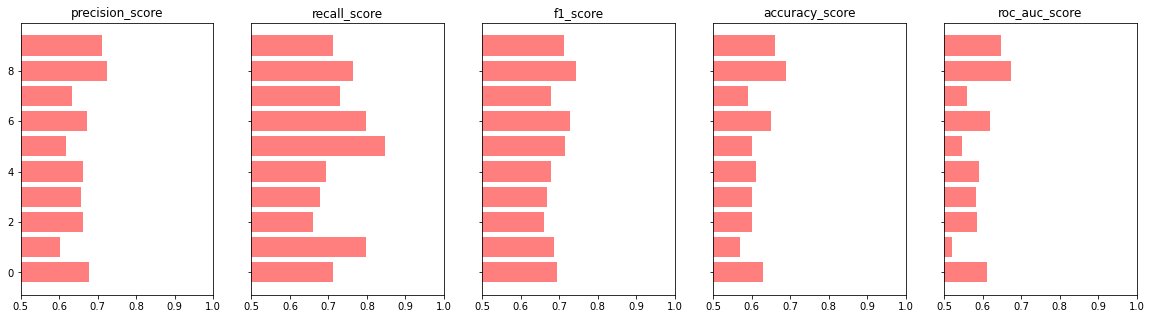

In [85]:
fig, axs = plt.subplots(1, 5, figsize=(20,5), sharey=True)

objects = [name for (name, model) in models]
objects.reverse()
y_pos = np.arange(len(objects))

j = 0

for name in d:
  performance = d[name]
  performance.reverse()
  colors = ["r" if p < 1 else "b" for p in performance]
  axs[j].barh(y_pos, performance, align="center", alpha=0.5, color=colors)
  axs[j].set_title(name)
  j+=1

for ax in axs:
  ax.set_xlim([0.5, 1])

Confusion matrices:

C:\Users\Admin\AppData\Local\Temp\ipykernel_1720\1194521790.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


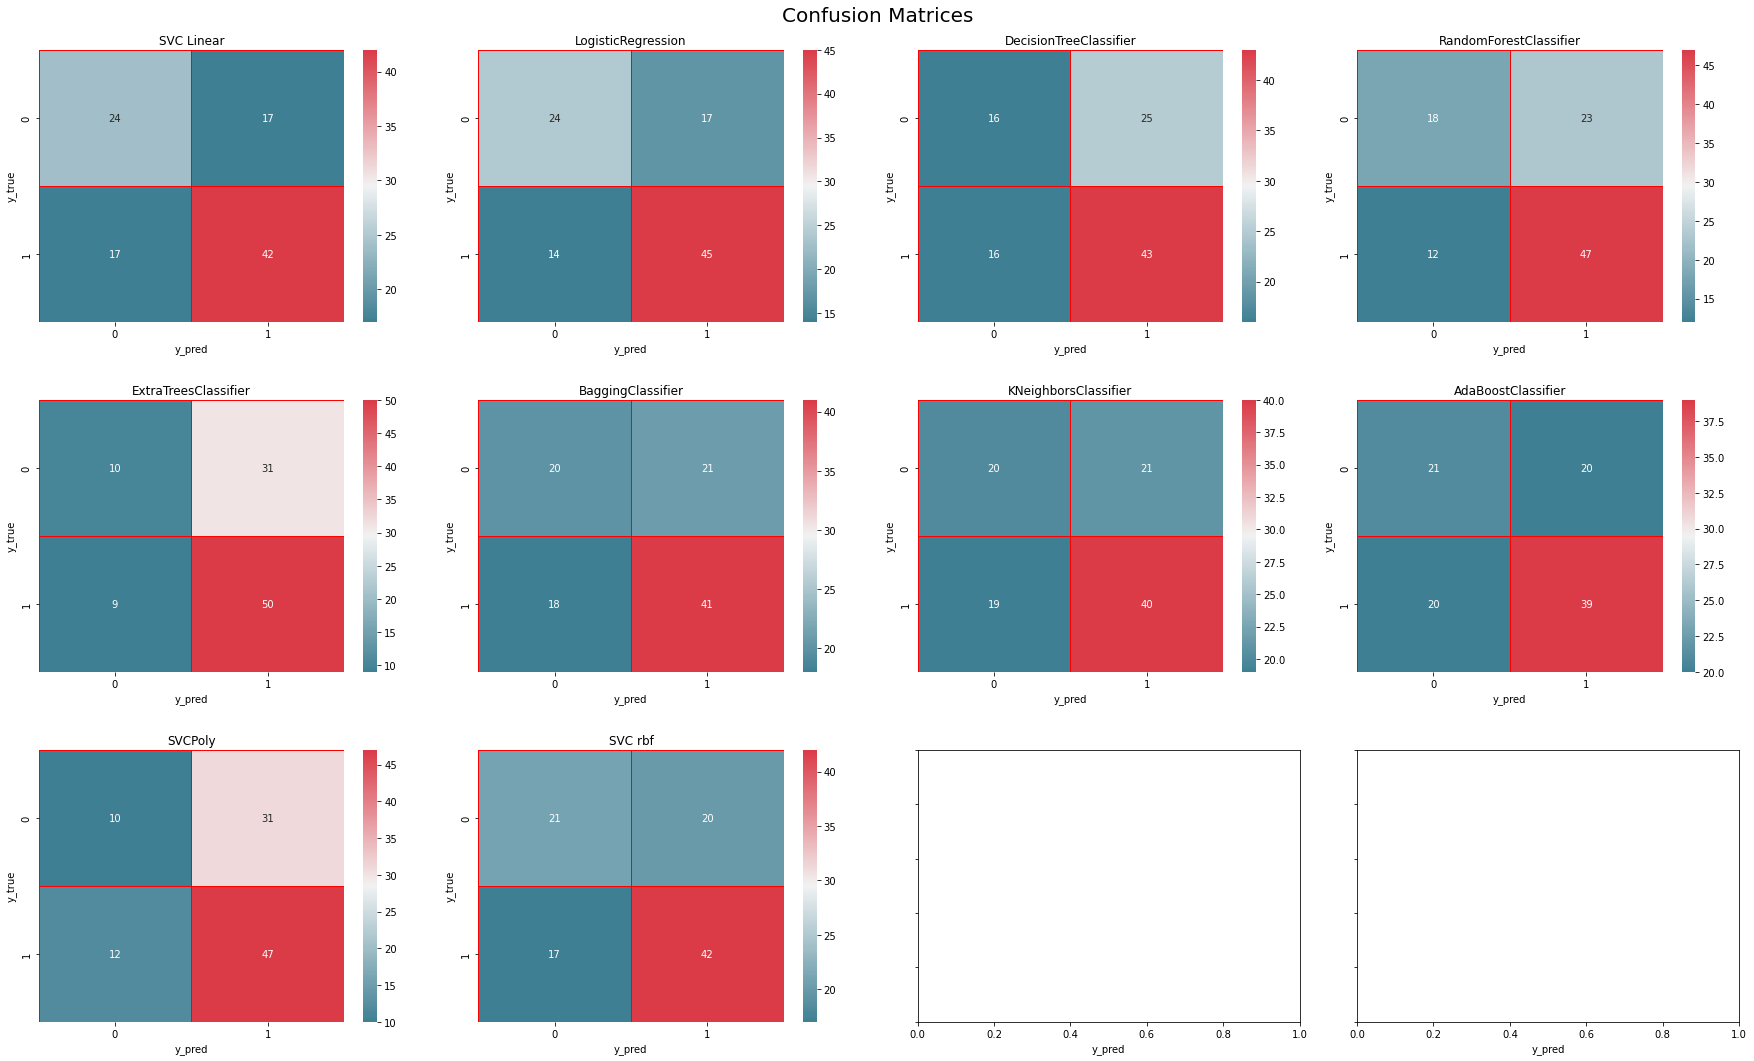

In [86]:
from sklearn.metrics import confusion_matrix

fig, axs = plt.subplots(3, 4, figsize=(25,15))

i = 0
j = 0

cmap = sns.diverging_palette(220, 10, as_cmap=True)


for name, model in models:
  cm = confusion_matrix(y_test, model.predict(X_test))
  sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",cmap=cmap,fmt=".0f",ax=axs[i,j])
  axs[i,j].set_title(name)
  j=j+1
  if j == 4:
    i=i+1
    j=0
    

for ax in axs.flat:
    ax.set(xlabel="y_pred", ylabel="y_true")
    ax.label_outer()

fig.tight_layout(pad=3.0)
fig.suptitle("Confusion Matrices", fontsize=20, verticalalignment="bottom")
fig.show()